In [1]:
# in this notebook, we are testing out some new math to make the model a bit more self-consistent and logical
# and making sure it still runs to steady state in a reasonable time when those changes are made
# see notes from 3/8/23 in red, gridded notebook for details on changes
# and/or compare to "default.ipynb"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create a profile
dx = 500
x = np.arange(0, 50000, dx)
x_node = x + (dx/2)

# add some elevation
Hstar = 0.5 # depth decay
etab = np.zeros(len(x)) # bedrock elevation
etab[:] = np.linspace(1, 0.1, len(x)) # need to start with slight bedrock slope
H = Hstar + np.zeros(len(x)) # alluvium thickness
eta = etab + H # topography

In [4]:
# define constants and other parameters
K = 1e-6 # erodibility
beta = 0 # abradability
r = 5. # runoff rate
U = 0.0001 # uplift or baselevel fall rate
I = 0.01 # intermittency
phi = 0.1 # porosity
D = 0.01 # grain size
gamma = 0.5 # fraction plucked that becomes coarse

kqs = 0.041 # sed transport coeff
kxb = 25 # valley width coeff
Pxb = 1./5. # valley width exp
kb = 8.3e-8 # channel width coeff

B_valley = kxb * (x_node**Pxb) # valley width
# Q = (r * kxb * x_node**(1 + Pxb))/(1 + Pxb) # discharge
A = (1./3.) * (x**2)
Q = r * A

In [5]:
def model(x, dx, x_node,
          K, beta, gamma,
          D, phi, Hstar,
          kb, kqs, I, r, U,
          etab, H, eta,
          B_valley, Q,
          num_steps = 1):
    
    q = Q/B_valley
    dt = 35
    
    run_duration = dt * num_steps
    cum_time = 0.0
    
    Qs = np.zeros(len(x))
    qs = np.zeros(len(x))
    Eb_p = np.zeros(len(x))
    Eb_a = np.zeros(len(x))
    Eb = np.zeros(len(x))
    Eh = np.zeros(len(x))
    E = np.zeros(len(x))
    ql = np.zeros(len(x)) # lateral sediment supply
    
    H[-1] = 0
    E[-1] = U
    q[0] = 0
    Qs[0] = 0
    
    while cum_time < run_duration:
        
        # drop baselevel
        eta[-1] -= U * dt
        
        # set boundary conditions
        etab[-1] = eta[-1]
        
        # calc slope
        S = -np.diff(eta)/dx
        
        # calc bed exposure
        alpha = np.exp(-H/Hstar)
        
        # calc sed transport
        Qs[1:] = kqs * I * Q[1:] * S**(7./6.) * (1 - alpha[:-1])
        qs[1:] = Qs[1:] / B_valley[1:]
        
        # calc bedrock erosion
        Eb_p[:-1] = K * Q[1:] * S**(7./6.) * alpha[:-1] * I
        Eb_a[:-1] = beta * Qs[1:] * alpha[:-1]
        Eb[:-1] = (Eb_p[:-1] + Eb_a[:-1]) / B_valley[:-1]
        
        # calc lateral flux
        ql[:-1] = ((Eb[:-1] * gamma)) #/beta) * (1 - np.exp(-beta * x[1:]/3))
        
        # calc grain attrition
        atr = Qs * beta
        
        # calc sediment erosion rate
        Eh[:-1] = 1/((1 - phi) * B_valley[:-1]) * (np.diff(Qs)/dx + atr[1:] - (Eb_p[:-1]*gamma) - ql[:-1])
        
        # calc total erosion rate
        E[:-1] = Eb[:-1] + Eh[:-1]
        
        # update topography
        etab[:-1] -= Eb[:-1] * dt
        H[:-1] -= Eh[:-1] * dt
        H[H<0] = 0
        eta[:-1] = etab[:-1] + H[:-1]
        
        # update elapsed time
        cum_time += dt
        
    print(cum_time)
        
    return (dt, S, q, alpha, Qs, qs, Eb_p, Eb_a, Eb, ql, atr, Eh, E, etab, H, eta)

In [8]:
#now write a test
num_steps = 10000000

test_run = [x, dx, x_node, 
            K, beta, gamma,
            D, phi, Hstar,
            kb, kqs, I, r, U,
            etab, H, eta,
            B_valley, Q,
            num_steps]

# and run it
(dt, S, q, alpha, Qs, qs, Eb_p, Eb_a, Eb, ql, atr, Eh, E, etab, H, eta) = model(*test_run)

350000000.0


In [9]:
Eb

array([9.99999999e-05, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
      

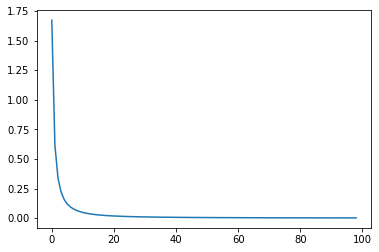

In [10]:
plt.plot(S)

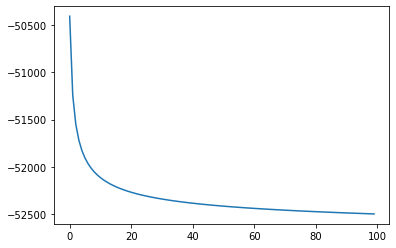

In [11]:
plt.plot(eta)

In [12]:
S[-1]

0.002216665684565669

In [11]:
eta

array([-16424.63967771, -17063.37758197, -17232.48150727, -17292.66528874,
       -17320.86606908, -17338.64304955, -17351.85699822, -17362.53079836,
       -17371.55984743, -17379.41587515, -17386.37950219, -17392.63305383,
       -17398.30310469, -17403.48212242, -17408.24040909, -17412.63313354,
       -17416.70470151, -17420.49159706, -17424.0243029 , -17427.32864236,
       -17430.42674502, -17433.33775949, -17436.07839151, -17438.66331851,
       -17441.10551443, -17443.41650842, -17445.60659363, -17447.68499783,
       -17449.66002435, -17451.53916966, -17453.32922232, -17455.03634679,
       -17456.66615509, -17458.22376831, -17459.71386974, -17461.14075104,
       -17462.5083525 , -17463.82029828, -17465.07992745, -17466.29032138,
       -17467.4543279 , -17468.57458292, -17469.65352952, -17470.6934351 ,
       -17471.69640667, -17472.66440465, -17473.59925516, -17474.50266119,
       -17475.37621263, -17476.22139538, -17477.03959954, -17477.83212693,
       -17478.60019783, -

In [12]:
eta_adj = eta - eta[-1]

In [13]:
eta_adj

array([1.07476032e+03, 4.36022419e+02, 2.66918494e+02, 2.06734712e+02,
       1.78533932e+02, 1.60756951e+02, 1.47543003e+02, 1.36869203e+02,
       1.27840154e+02, 1.19984126e+02, 1.13020499e+02, 1.06766947e+02,
       1.01096896e+02, 9.59178786e+01, 9.11595919e+01, 8.67668674e+01,
       8.26952995e+01, 7.89084039e+01, 7.53756981e+01, 7.20713586e+01,
       6.89732560e+01, 6.60622415e+01, 6.33216095e+01, 6.07366825e+01,
       5.82944866e+01, 5.59834926e+01, 5.37934074e+01, 5.17150032e+01,
       4.97399766e+01, 4.78608313e+01, 4.60707787e+01, 4.43636542e+01,
       4.27338459e+01, 4.11762327e+01, 3.96861312e+01, 3.82592499e+01,
       3.68916485e+01, 3.55797027e+01, 3.43200735e+01, 3.31096796e+01,
       3.19456731e+01, 3.08254181e+01, 2.97464715e+01, 2.87065659e+01,
       2.77035943e+01, 2.67355963e+01, 2.58007458e+01, 2.48973398e+01,
       2.40237884e+01, 2.31786056e+01, 2.23604014e+01, 2.15678741e+01,
       2.07998032e+01, 2.00550438e+01, 1.93325208e+01, 1.86312234e+01,
      

In [14]:
ql

array([0.00799556, 0.01535183, 0.02211992, 0.02834687, 0.03407594,
       0.03934693, 0.04419649, 0.04865829, 0.05276334, 0.05654018,
       0.06001503, 0.06321206, 0.06615346, 0.06885968, 0.07134952,
       0.07364029, 0.07574789, 0.07768698, 0.07947103, 0.08111244,
       0.08262261, 0.08401203, 0.08529035, 0.08646647, 0.08754855,
       0.08854412, 0.08946008, 0.0903028 , 0.09107815, 0.0917915 ,
       0.09244782, 0.09305165, 0.09360721, 0.09411835, 0.09458862,
       0.09502129, 0.09541937, 0.09578562, 0.09612258, 0.0964326 ,
       0.09671783, 0.09698026, 0.09722171, 0.09744385, 0.09764823,
       0.09783626, 0.09800927, 0.09816844, 0.09831488, 0.09844961,
       0.09857358, 0.09868763, 0.09879256, 0.0988891 , 0.09897792,
       0.09905964, 0.09913483, 0.09920401, 0.09926765, 0.09932621,
       0.09938008, 0.09942965, 0.09947525, 0.0995172 , 0.09955581,
       0.09959132, 0.099624  , 0.09965406, 0.09968172, 0.09970717,
       0.09973058, 0.09975212, 0.09977194, 0.09979018, 0.09980

In [15]:
Eb

array([1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 0.e+00])

In [16]:
ql/B_valley

array([0.000106  , 0.00016338, 0.00021255, 0.00025466, 0.00029112,
       0.00032293, 0.00035081, 0.00037533, 0.00039693, 0.00041599,
       0.0004328 , 0.00044764, 0.00046072, 0.00047224, 0.00048237,
       0.00049126, 0.00049905, 0.00050583, 0.00051173, 0.00051683,
       0.00052121, 0.00052495, 0.00052812, 0.00053076, 0.00053294,
       0.00053471, 0.0005361 , 0.00053716, 0.00053791, 0.0005384 ,
       0.00053865, 0.00053868, 0.00053852, 0.00053818, 0.0005377 ,
       0.00053708, 0.00053634, 0.0005355 , 0.00053456, 0.00053354,
       0.00053245, 0.0005313 , 0.00053009, 0.00052884, 0.00052754,
       0.00052622, 0.00052486, 0.00052348, 0.00052208, 0.00052067,
       0.00051924, 0.00051781, 0.00051637, 0.00051492, 0.00051348,
       0.00051204, 0.0005106 , 0.00050917, 0.00050774, 0.00050632,
       0.00050491, 0.00050351, 0.00050212, 0.00050074, 0.00049937,
       0.00049801, 0.00049667, 0.00049534, 0.00049402, 0.00049271,
       0.00049142, 0.00049015, 0.00048889, 0.00048764, 0.00048

In [17]:
# save csv files

np.savetxt('elevation csv files/eta_default.csv', eta_adj, delimiter = ',')
np.savetxt('alpha csv files/alpha_default.csv', alpha, delimiter = ',')
np.savetxt('slope csv files/slope_default.csv', S, delimiter = ',')